# Wrangle and Analyze Data

In [79]:
# Import statements
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
from timeit import default_timer as timer
from tweepy import OAuthHandler

# Gathering

Loading the twitter-archive-enhanced.csv into a DataFrame [WeRateDogs Twitter archive]

In [80]:
# Load the enhanced twitter archive file we were given
df = pd.read_csv('twitter-archive-enhanced.csv')

Loading the tweet image predictions from Udacity's servers

In [81]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

with open('image-predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [82]:
image_df = pd.read_csv('image-predictions.tsv', sep='\t')

Loading Favorite count and retweet count from Twitter

In [83]:
consumer_key ='xxxx'
consumer_secret ='xxxx'
access_token ='xxxx'
access_secret = 'xxxx'

In [84]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [85]:
#make sure of df and DataFrame
df_tweet_json = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_tweet_json = df_tweet_json.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_tweet_json = df_tweet_json.reset_index(drop=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [87]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [88]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


# 1. Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, etweeted_status_user_id, retweeted_status_timestamp, expanded_urls

# 2. Timestamp and retweeted_status_timestamp is an object

# 3. Source columns have HTML tags

# 4. This dataset includes retweets, which means there is duplicated data

In [89]:
# checks for duplicated entries in df
df[df.duplicated()].shape[0]

0

# No Duplicates entry present

In [90]:
df["rating_numerator"].max()

1776

In [91]:
df["rating_denominator"].max()

170

# rating_numerator contains max value 1776 and rating_denominator contains max value of 17

In [92]:
df[df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
quite            4
just             4
one              4
not              2
mad              2
actually         2
getting          2
incredibly       1
all              1
life             1
officially       1
such             1
his              1
unacceptable     1
light            1
by               1
infuriating      1
space            1
my               1
old              1
this             1
Name: name, dtype: int64

In [93]:
df[df.name.str.isupper()].name.value_counts()

O     1
JD    1
Name: name, dtype: int64

# Dogs name have 'None', or 'a', or 'an.' or 'O' or 'by' and some more lower case words as names

# Access image_df

In [94]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [95]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [96]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# dog breeds are not consistently in p1,p2,p3 columns i.e lower or uppercase

In [97]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [98]:
# checks for duplicated entries in image_pred_df
image_df[image_df.duplicated()].shape[0]

0

In [99]:
# Count of duplicate jpg_url
image_df[image_df.jpg_url.duplicated()].shape[0]

66

# jpg_url contains duplicate items means duplicate image links

In [100]:
image_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [101]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 55.3+ KB


In [102]:
df_tweet_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [103]:
df_tweet_json.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


In [104]:
df_tweet_json.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
unique,2354,1724,2007
top,730924654643314689,3652,0
freq,1,5,179


In [105]:
df_tweet_json.sample(20)

,tweet_id,retweet_count,favorite_count
1707,680609293079592961,816,2906
757,778408200802557953,5023,15135
2343,666063827256086533,232,496
547,805487436403003392,2929,9773
553,803773340896923648,3220,11203
450,818627210458333184,8564,24597
1990,672614745925664768,644,1302
78,877556246731214848,3994,23258
175,857746408056729600,11524,36021
951,751830394383790080,2227,6428


In [106]:
df_tweet_json[df_tweet_json.duplicated()]

,tweet_id,retweet_count,favorite_count


# No Duplicate entries present

# Quality Issues

# df:
1) Missing data in the following columns: in_reply_to_status_id, in_reply_to_user_id,         
2) retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls 
3) This dataset includes retweets, which means there is duplicated data 
4) Timestamp and retweeted_status_timestamp is an object 
5) The source column still has the HTML tags 
6) Dogs name have 'None', or 'a', or 'an.' and some more lower case words as names 
7) Multiple dog stages occurs such as 'doggo puppo', 'doggo pupper', 'doggo floofer' 

# image_df:

1) dog breeds are not consistently in p1,p2,p3 columns 

# df_tweet_json:

1) Missing data 
2) tweet_id is an object 

# Tidiness Issues

# df:

1) The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns

# image_df:

2) This data set is part of the same observational unit as the data in the archive_df 

# df_tweet_json:

3) This data set is also part of the same observational unit as the data in the archive_df 

# Cleaning Data

# Making a copy of the dataframes before cleaning

In [107]:
df_clean = df.copy()
image_df_clean = image_df.copy()
tweet_json_clean = df_tweet_json.copy()

# DEFINE-CODE-TEST

1) Convert the tweet_id in tweet_counts_clean into int64 type for merging

2) Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer'

3) Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements

4) Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

5) Convert the tweet_id in master_df into object type as it cannot be used further as maths operation

6) Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column

7) Remove Inconsistency in pred_breed

8) Delete retweets

9) Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

10) Change the timestamp to correct datetime format

11) Removing HTML tags from source column

12) Dog ratings get standardized for denom of 10.

# DEFINE

1. Convert the tweet_id in tweet_json_clean dataframe into int type for merging into master dataframe

# CODE 

In [108]:
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype('int64')

# Test

In [109]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: int64(1), object(2)
memory usage: 55.3+ KB


# DEFINE

2. Creates a predicted dog breed column, based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements

# CODE

In [110]:
image_df_clean.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True


In [111]:
image_df_clean['pred_breed'] = [df['p1'] if df['p1_dog'] == True and df['p1_conf'] > 0.2 
                     else df['p2'] if df['p2_dog'] == True and df['p2_conf'] > 0.2
                     else df['p3'] if df['p3_dog'] == True and df['p3_conf'] > 0.2
                     else np.nan for index, df in image_df_clean.iterrows()]

In [112]:
## Drop 'p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf' columns
image_df_clean.drop(['p1', 'p1_dog', 'p1_conf','p2', 'p2_dog', 'p2_conf','p3', 'p3_dog', 'p3_conf'], axis = 1, inplace=True)

# Test

In [113]:
image_df_clean.head()

,tweet_id,jpg_url,img_num,pred_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


# DEFINE

3) Create one column for the various dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer' ascolumn name ' type ' with the categorical dtype

# CODE

In [114]:
#Number of columns in df_clean
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [115]:
# as there are separate columns for dogs type 'doggo','floofer','pupper'and so on...
#i will convert them into one column
df_clean.doggo.replace(np.NaN, '', inplace=True)
df_clean.floofer.replace(np.NaN, '', inplace=True)
df_clean.pupper.replace(np.NaN, '', inplace=True)
df_clean.puppo.replace(np.NaN, '', inplace=True)
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

In [116]:
df_clean['stage'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo
df_clean.loc[df_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_clean.loc[df_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_clean.loc[df_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [117]:
# Convert the stage in df_clean into categorical dtype
df_clean['stage'] = df_clean['stage'].astype('category')

In [118]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_clean.stage.replace('', np.nan, inplace=True)

# Test

In [119]:
df_clean.info()
df_clean.stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  stage             

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

In [120]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2356 non-null   int64   
 1   in_reply_to_status_id       78 non-null     float64 
 2   in_reply_to_user_id         78 non-null     float64 
 3   timestamp                   2356 non-null   object  
 4   source                      2356 non-null   object  
 5   text                        2356 non-null   object  
 6   retweeted_status_id         181 non-null    float64 
 7   retweeted_status_user_id    181 non-null    float64 
 8   retweeted_status_timestamp  181 non-null    object  
 9   expanded_urls               2297 non-null   object  
 10  rating_numerator            2356 non-null   int64   
 11  rating_denominator          2356 non-null   int64   
 12  name                        2356 non-null   object  
 13  stage             

# DEFINE

4) Merge the copied df_clean, image_df_clean, and tweet_json_clean dataframes

# CODE

In [121]:
from functools import reduce
data = [df_clean, image_df_clean, tweet_json_clean]
main_df = reduce(lambda left, right:  pd.merge(left, right,on = 'tweet_id'), data)

# Test

In [122]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2073 non-null   int64   
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2073 non-null   object  
 4   source                      2073 non-null   object  
 5   text                        2073 non-null   object  
 6   retweeted_status_id         79 non-null     float64 
 7   retweeted_status_user_id    79 non-null     float64 
 8   retweeted_status_timestamp  79 non-null     object  
 9   expanded_urls               2073 non-null   object  
 10  rating_numerator            2073 non-null   int64   
 11  rating_denominator          2073 non-null   int64   
 12  name                        2073 non-null   object  
 13  stage             

# DEFINE

5) Convert the tweet_id in master_df into object type as there is no use for maths operation in tweet_id

# CODE

In [123]:
main_df['tweet_id'] = main_df['tweet_id'].astype('object')

In [124]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   tweet_id                    2073 non-null   object  
 1   in_reply_to_status_id       23 non-null     float64 
 2   in_reply_to_user_id         23 non-null     float64 
 3   timestamp                   2073 non-null   object  
 4   source                      2073 non-null   object  
 5   text                        2073 non-null   object  
 6   retweeted_status_id         79 non-null     float64 
 7   retweeted_status_user_id    79 non-null     float64 
 8   retweeted_status_timestamp  79 non-null     object  
 9   expanded_urls               2073 non-null   object  
 10  rating_numerator            2073 non-null   int64   
 11  rating_denominator          2073 non-null   int64   
 12  name                        2073 non-null   object  
 13  stage             

# DEFINE

6. Replace 'a', 'an', 'the', 'None' and other lower case words with NaN in name column

# CODE

In [125]:
words = main_df[main_df.name.str.islower()].name.unique()

In [126]:
main_df['name'] = main_df['name'].replace(words, np.nan)
main_df['name'] = main_df['name'].replace('None', np.nan)

In [127]:
main_df['name'].dropna()

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
           ...    
2032    Christoper
2034       Jimothy
2035      Kreggory
2036         Scout
2042        Walter
Name: name, Length: 1396, dtype: object

# Test

In [128]:
main_df.name.value_counts()

Charlie    11
Tucker     10
Penny      10
Cooper     10
Lucy       10
           ..
Gustaf      1
Lili        1
Vince       1
Jeffri      1
Levi        1
Name: name, Length: 913, dtype: int64

# DEFINE

7) Delete Retweets

# CODE

In [129]:
# Delete the rows which contains retweets
main_df = main_df.drop(main_df[(main_df['in_reply_to_status_id'].isnull() == False) | (main_df['retweeted_status_id'].isnull() == False)].index)

# Test

In [130]:
main_df.shape[0]

1971

In [131]:
main_df.shape

(1971, 19)

# DEFINE

8) Remove columns no longer needed: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp

# CODE

In [132]:
# drop the reply status and retweet status columns
main_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'], axis=1, inplace=True)

# Test

In [133]:
main_df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage', 'jpg_url',
       'img_num', 'pred_breed', 'retweet_count', 'favorite_count'],
      dtype='object')

In [134]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   object  
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   object  
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1349 non-null   object  
 8   stage               303 non-null    category
 9   jpg_url             1971 non-null   object  
 10  img_num             1971 non-null   int64   
 11  pred_breed          1402 non-null   object  
 12  retweet_count       1971 non-null   object  
 13  favorite_count      1971 non-null   object  
dtypes: category(1), int64(3), object(10)
memory usage: 217.9+ KB


# DEFINE

9) Change the timestamp to correct datetime format

# CODE

In [135]:
main_df['timestamp'].sample(5)

1046    2016-03-18 14:19:56 +0000
1847    2015-11-27 20:30:30 +0000
986     2016-04-09 02:47:55 +0000
999     2016-04-04 01:41:58 +0000
809     2016-07-02 00:27:45 +0000
Name: timestamp, dtype: object

In [136]:
main_df['timestamp'] = pd.to_datetime(main_df['timestamp'], format='%Y-%m-%d %H:%M:%S')

# Test

In [137]:
main_df['timestamp'].sample(5)

1063   2016-03-14 03:50:21+00:00
1201   2016-02-12 00:39:39+00:00
343    2017-01-16 17:20:45+00:00
1587   2015-12-12 01:38:53+00:00
1303   2016-01-19 03:10:43+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [138]:
main_df['timestamp'].describe()

count                          1971
unique                         1971
top       2016-08-04 22:52:29+00:00
freq                              1
first     2015-11-15 22:32:08+00:00
last      2017-08-01 16:23:56+00:00
Name: timestamp, dtype: object

# DEFINE

10) Removing HTML tags from source column

# CODE

In [139]:
href = main_df["source"].str.split('"', expand = True)
main_df["source"] = href[1]

# Test

In [140]:
main_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,pred_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,NaN,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,9774,41048


In [141]:
href

,0,1,2,3,4
0,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
1,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
3,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
4,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
...,...,...,...,...,...
2068,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2069,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2070,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>
2071,<a href=,http://twitter.com/download/iphone,rel=,nofollow,>Twitter for iPhone</a>


In [142]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1349 non-null   object             
 8   stage               303 non-null    category           
 9   jpg_url             1971 non-null   object             
 10  img_num             1971 non-null   int64              
 11  pred_breed          1402 non-null   object             
 12  retweet_count       1971 non-null 

In [143]:
main_df.describe()

,rating_numerator,rating_denominator,img_num
count,1971.000000,1971.000000,1971.000000
mean,12.223237,10.477423,1.201928
std,41.634034,6.853275,0.559020
min,0.000000,2.000000,1.000000
25%,10.000000,10.000000,1.000000
50%,11.000000,10.000000,1.000000
75%,12.000000,10.000000,1.000000
max,1776.000000,170.000000,4.000000


# DEFINE

12. Standardize dog ratings

# CODE

In [144]:
ratings = main_df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

In [145]:
main_df.rating_numerator = ratings
main_df['rating_numerator'] = main_df['rating_numerator'].astype('float64')

In [146]:
# standardizing to a denominator of 10 for groups of dogs:

rating_num = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
rating_denom = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(main_df['rating_numerator'], main_df['rating_denominator'])]
main_df['rating_numerator'] = rating_num
main_df['rating_denominator'] = rating_denom

main_df = main_df.drop(main_df[((main_df['rating_denominator'] != 10) | (main_df['rating_numerator'] > 20))].index)

# Test

In [147]:
main_df['rating_numerator'].unique()

array([13.  , 12.  , 14.  , 13.5 , 11.  ,  6.  , 10.  ,  0.  ,  9.75,
        5.  , 11.27,  3.  ,  7.  ,  8.  ,  9.  ,  4.  ,  2.  , 11.26,
        1.  ])

In [148]:
main_df['rating_denominator'].unique()

array([10])

# Storing, Analyzing, and Visualizing Data

In [149]:
# storing main dataframe as csv
main_df.to_csv('main_df.csv', encoding='utf-8', index=False)

In [150]:
# read main_df.csv
df1 = pd.read_csv('main_df.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1968 non-null   int64  
 1   timestamp           1968 non-null   object 
 2   source              1968 non-null   object 
 3   text                1968 non-null   object 
 4   expanded_urls       1968 non-null   object 
 5   rating_numerator    1968 non-null   float64
 6   rating_denominator  1968 non-null   int64  
 7   name                1347 non-null   object 
 8   stage               303 non-null    object 
 9   jpg_url             1968 non-null   object 
 10  img_num             1968 non-null   int64  
 11  pred_breed          1401 non-null   object 
 12  retweet_count       1968 non-null   int64  
 13  favorite_count      1968 non-null   int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 215.4+ KB


In [151]:
df1.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,retweet_count,favorite_count
count,1.968000e+03,1968.000000,1968.0,1968.000000,1968.000000,1968.000000
mean,7.360298e+17,10.534949,10.0,1.202236,2784.247459,8952.847561
std,6.754171e+16,2.178525,0.0,0.559391,4701.046737,12276.706121
min,6.660209e+17,0.000000,10.0,1.000000,16.000000,81.000000
25%,6.758719e+17,10.000000,10.0,1.000000,627.750000,1984.000000
50%,7.088226e+17,11.000000,10.0,1.000000,1366.500000,4141.000000
75%,7.880674e+17,12.000000,10.0,1.000000,3238.500000,11412.250000
max,8.924206e+17,14.000000,10.0,4.000000,79515.000000,132810.000000


# What are the 10 most frequent dog names? 

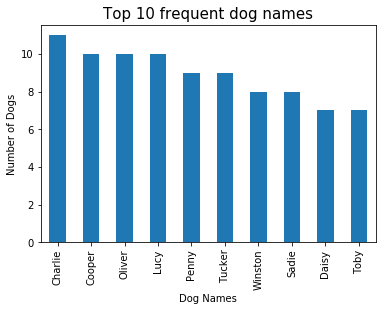

In [152]:
df1['name'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

# Most of the dogs are of names: Charlie, OLiver,Cooper, Penny, Tucker, Lucy, Sadie, Winston, Daisy,Lola

# Also, check the count below:

In [153]:
#Top 10 frequent dog names
df1['name'].value_counts()[0:10].sort_values(ascending=False)

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
Tucker      9
Winston     8
Sadie       8
Daisy       7
Toby        7
Name: name, dtype: int64

# What are the 10 most frequent predicted dog breeds?

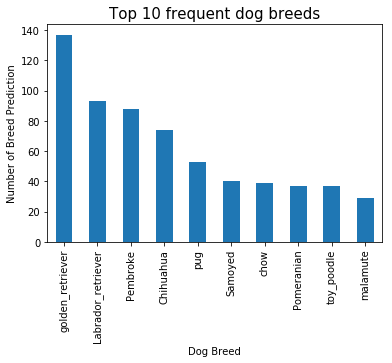

In [154]:
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 10 frequent dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.plot();

# Most of the dogs have golden retriever, labrador retriever as breed which all are rated

# Please check the top 10 rated dog breeds below:

In [155]:
#Top 10 frequent dog breeds
df1['pred_breed'].value_counts()[0:10].sort_values(ascending=False)

golden_retriever      137
Labrador_retriever     93
Pembroke               88
Chihuahua              74
pug                    53
Samoyed                40
chow                   39
Pomeranian             37
toy_poodle             37
malamute               29
Name: pred_breed, dtype: int64

# Findings of the analysis

1) The pred_breed column is created based on the the confidence level of minimum 20% and 'p1_dog', 'p2_dog' and 'p3_dog' statements

2) Based on dog types: doggo, floofer, pupper, puppo, 'doggo, puppo', 'doggo, pupper', 'doggo, floofer', only one categorical column is created named as 'stage'

3) tweet_id is set as object type as it is not going to use for calculation.

4) A main dataframe is created using df_clean, image_df_clean, and tweet_json_clean dataframes

5) Dog Names Issue got rectified

6) Inconsistency in pred_breed got removed

7) All retweets get deleted to get unique tweets

8) The columns such as in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp is removed which is not needed

9) Timestamp format got corrected to datetime format

10) Extra HTML tags from source column get refracted

11) Dog ratings get standardized for denom of 10.

In [156]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Wrangle and Analyze data'])

0